<a href="https://colab.research.google.com/github/Sjleerodls/Data_Analysis/blob/main/lab_da/ml07_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent(경사 하강법)

* 머신 러닝의 목적은 비용(손실) 함수를 최소로 만드는 파라미터들을(w0, w1, w2, ...) 찾는 것.
* 회귀 문제인 경우 비용(손실) 함수는 MSE(w).
    * 회귀 문제에서는 w에 대한 2차 함수의 최솟값의 위치를 찾는 문제와 비슷함.
* 경사 하강법 : 최솟값의 위치를 찾는 알고리즘 중의 하나.
    * 비용(손실)의 임의의 위치에서 시작.
    * 그 위치에서 접선의 기울기(gradient)를 계산.
    * gradient의 절대값이 줄어드는 방향으로 w 값을 약간 변경.
    * 위의 과정을 충분히 반복하면 비용(손실) 함수가 최소가 되는 위치 w를 찾을 수 있음.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

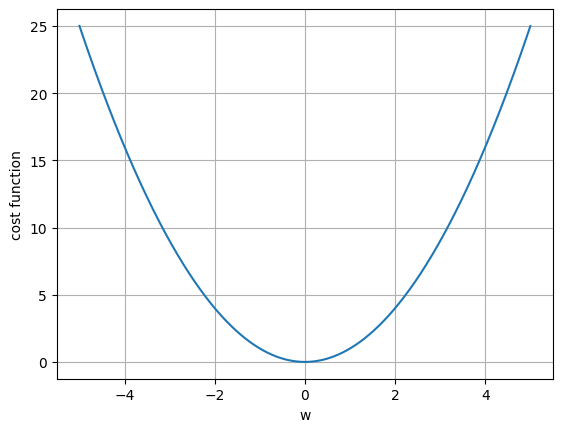

In [3]:
w = np.arange(-5, 5, 0.001)
f = w ** 2      # f : 비용함수의 매우 단순화된 버전

plt.plot(w, f)
plt.grid()
plt.xlabel('w')
plt.ylabel('cost function')
plt.show()

In [9]:
# 임의의 위치 w를 선택
w_init = 4

# 선택한 w에서 비용(손실) 함수의 gradient(접선의 기울기) 계산
gradient = 2 * w_init   # 접선 기울기, 미분시 w**2 = 2w

# 처음 위치에서 기울기의 반대 방향으로 약간 이동
w_next = w_init - gradient * 0.1

w_next

1.6

In [11]:
# 이동한 점에서 시작
w_init = w_next

# 선택한 w에서 비용(손실) 함수의 gradient(접선의 기울기) 계산
gradient = 2 * w_init   # 접선 기울기, 미분시 w**2 = 2w

# 처음 위치에서 기울기의 반대 방향으로 약간 이동
w_next = w_init - gradient * 0.1

w_next

0.25600000000000006

In [26]:
def gradient_descent(learning_rate=0.1, max_iter=1_000, tolerance=0.0001):       # 학습률=0.1, 최대 반복 횟수 = 1000
    # 비용 함수 시각화
    w = np.arange(-5, 5, 0.0001)
    f = w ** 2
    plt.plot(w, f, color='DarkGray')

    # w가 얼마일 때 함수 f가 최소일까?
    # 임의의 w 값에서 시작
    w_init = -4
    # 시작 w의 위치를 점으로 표시
    plt.scatter(w_init, w_init**2, label='0')

    convergence = False
    for n in range(max_iter):
        # 시작값에서 접선의 기울기 계산
        gradient = 2 * w_init
        # gradient가 감소하는 방향으로 w 값을 변경
        w_next = w_init - gradient * learning_rate
        # 이동한 점의 위치를 점으로 표시
        plt.scatter(w_next, w_next**2, label=f'{n + 1}')
        # 반복을 계속 할 지 멈출 지를 결정.
        if np.abs(w_next - w_init) < tolerance:
            # 이동한 w의 위치와 처음 w 위치 사이의 거리가 0.0001 미만이면
            convergence=True
            break
        # 다음 이동 위치를 계산하기 위해서 바뀐 현재 위치를 새로운 초기 위치로 변경
        w_init = w_next

    if convergence == False:
        print('최솟값으로 수렴하지 않았을 수도 있음.')
    plt.legend()
    plt.grid()
    plt.xlabel('w')
    plt.ylabel('cost function')
    plt.show()

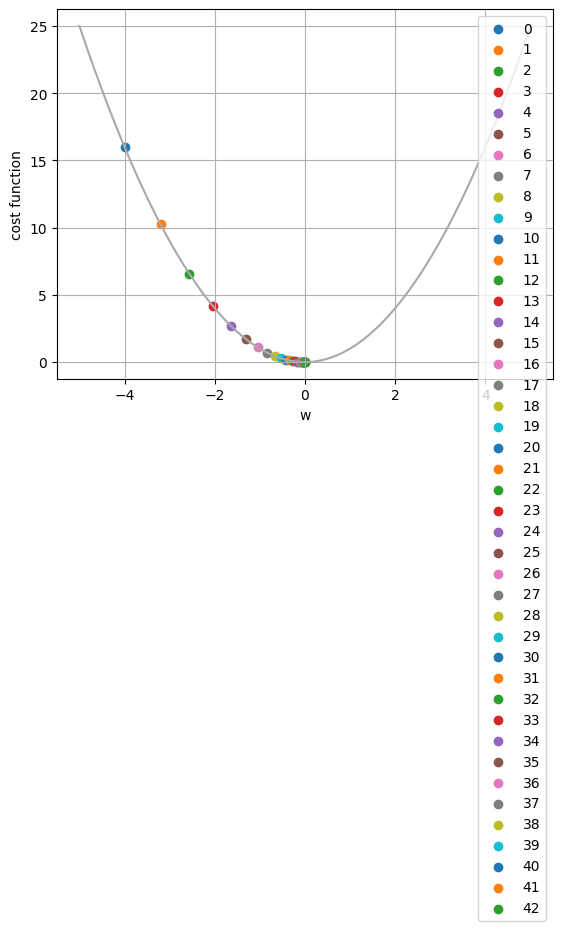

In [28]:
gradient_descent()

최솟값으로 수렴하지 않았을 수도 있음.


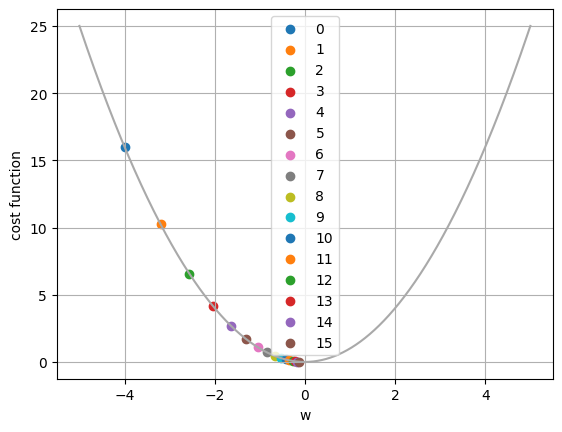

In [27]:
gradient_descent(max_iter=15)

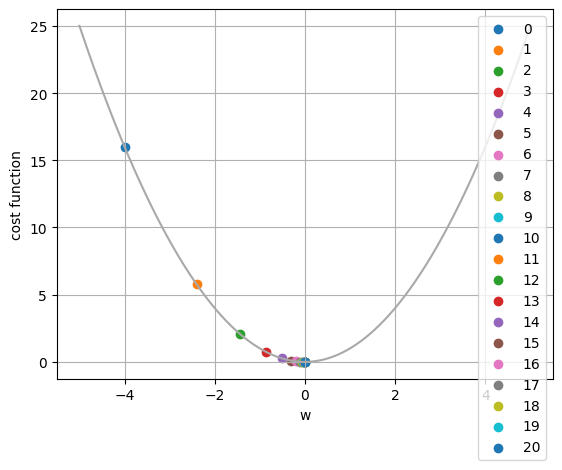

In [29]:
gradient_descent(learning_rate=0.2)

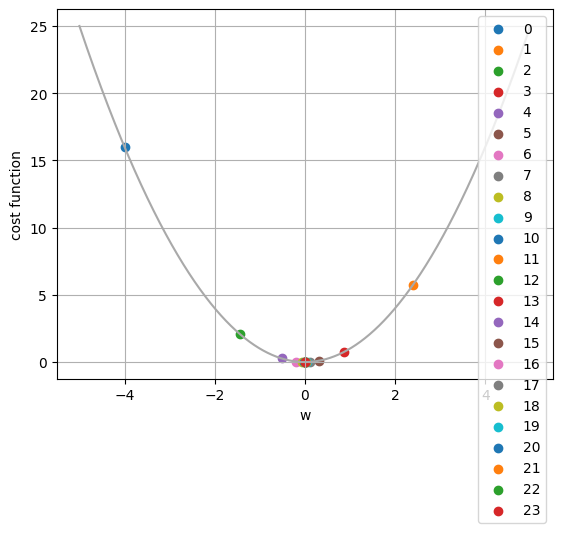

In [31]:
gradient_descent(learning_rate=0.8)     # 학습률이 크다고 무조건 결과가 빨리 나오지 않음. 오히려 더 늘어날 수도 있음.

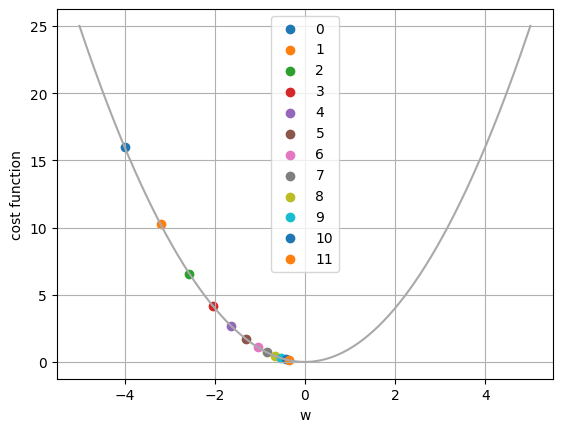

In [32]:
gradient_descent(tolerance=0.1)     # |w(next) - w(init)| < tol(0.1)

최솟값으로 수렴하지 않았을 수도 있음.


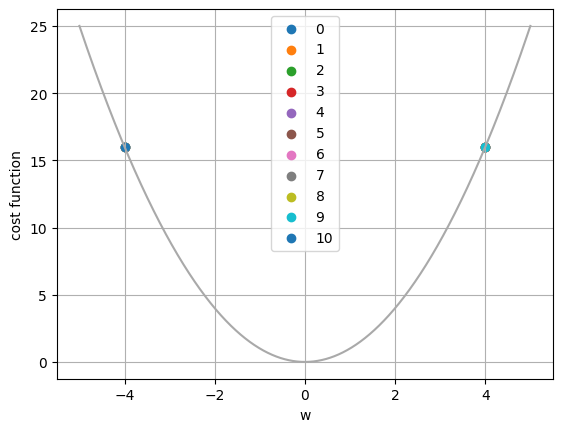

In [33]:
gradient_descent(learning_rate=1.0, max_iter=10)

**학습률(learning rate) 하이퍼 파라미터**

* 학습률이 작은 경우에는 최솟값을 향해서 천천히 움직임.
* 학습률이 큰 경우에는 최솟값을 향해서 빠르게 또는 불안정하게 움직임.
* 학습률이 너무 작으면 최대 반복 횟수(max_iter) 안에서 최솟값으로 수렴(convergence)하지 못할 수도 있음.
    * 학습률을 키워줌   (learning_rate)
    * 최대 반복 횟수를 늘려줌 (max_iter)
    * 수렴 반경(tolerance)을 늘려줌.
* 학습률이 너무 크면 수렴하지 못하고 발산(divergence)하는 경우가 생기기도 함.
    * 학습률을 줄여야 함.
* ML 러닝 알고리즘들 중에서는 처음에는 학습률을 크게 하고, 에포크(epoch, 반복)가 진행될 때마다 학습률을 점점 줄여나가는 방식으로 데이터를 학습하는 알고리즘도 있음.

# SGD(Stochastic Gradient Descent, 확률적 경사 하강법)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor

In [35]:
# 데이터 셋
file_path = 'https://github.com/JakeOh/202505_BD50/raw/refs/heads/main/datasets/fish.csv'

In [36]:
fish = pd.read_csv(file_path)

In [37]:
perch = fish[fish.Species == 'Perch']

In [38]:
X = perch[perch.columns[2:]].values # 특성 배열
y = perch['Weight'].values  # 타겟 배열

In [39]:
# 훈련 셋/ 테스트 셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [46]:
sgd = SGDRegressor(random_state=42)    # 모델 생성

In [47]:
sgd.fit(X_train, y_train)   # ML 모델 훈련 -> 비용(손실) 함수를 최소로 만드는 w들을 찾음.

SGDRegressor(random_state=42)

In [48]:
sgd.score(X_train, y_train)     # 훈련 셋에서의 결정계수(r2 score)

-1.042364600407224e+19

In [49]:
sgd.score(X_test, y_test)       # 테스트 셋의 결정계수

-1.1158958450602756e+19

훈련 셋의 샘플 개수가 너무 작아서, 1,000번 반복(epoch)만으로는 최적의 값으로 수렴되지 않음.

해결 방법:
* 학습률을 키움.
* 반복 횟수를 늘려줌.
* 규제의 크기를 줄임.

* SGDRegressor 사용
* max_iter = 1_000_000_000
* learning_rate = ['constant', 'invscaling', 'adaptive']
* eta0 = [0.01, 0.1, 1.0, 10]
* learing_rate와 eta0를 바꾸면서 훈련 셋과 테스트 셋에서의 결정계수를 출력

In [57]:
learning_rate = ['constant', 'invscaling', 'adaptive']
eta0 = [0.01, 0.1, 1.0, 10]

def sgd_result(X_train, X_test, y_train, y_test, max_iter=1_000_000_000, random_state=42):
    for lr in learning_rate:
        for et in eta0:
            sgd = SGDRegressor(learning_rate=lr, eta0=et, max_iter=max_iter, random_state=random_state)
            sgd.fit(X_train, y_train)
            train_score = sgd.score(X_train, y_train)
            test_score = sgd.score(X_test, y_test)
            print(f'learning_rate={lr}, eta0={et} -> train : {train_score:.4f}, test : {test_score:.4f}')

In [58]:
sgd_result(X_train, X_test, y_train, y_test)

learning_rate=constant, eta0=0.01 -> train : -2695655118097932091392.0000, test : -2899041701044528611328.0000
learning_rate=constant, eta0=0.1 -> train : -280849316446160352706560.0000, test : -301708285133308240592896.0000
learning_rate=constant, eta0=1.0 -> train : -27952004419650978857353216.0000, test : -30028996360562919088324608.0000
learning_rate=constant, eta0=10 -> train : -674050607382521326828781568.0000, test : -725001604229677268407943168.0000
learning_rate=invscaling, eta0=0.01 -> train : -10423646004072239104.0000, test : -11158958450602756096.0000
learning_rate=invscaling, eta0=0.1 -> train : -1168264683947032444928.0000, test : -1249405582907469987840.0000
learning_rate=invscaling, eta0=1.0 -> train : -10653476588251099693056.0000, test : -11721374953505718009856.0000
learning_rate=invscaling, eta0=10 -> train : -1580326212880955753889792.0000, test : -1638113341848484424187904.0000
learning_rate=adaptive, eta0=0.01 -> train : -1013829924893422.8750, test : -236248991

In [64]:
max_iter = 1_000_000_000    # 최대 반복(epoch) 횟수
learning_rates = ['constant', 'invscaling', 'adaptive'] # 학습률 적용 방법
etas = [0.01, 0.1, 1.0, 10]     # 학습률 초깃값

for lr in learning_rates:
    for e in etas:
        sgd = SGDRegressor(max_iter=max_iter, learning_rate=lr, eta0=e, random_state=42)
        sgd.fit(X_train, y_train)
        train_score = sgd.score(X_train, y_train)
        test_score = sgd.score(X_test, y_test)
        print(f'learning rate={lr}, eta0={e}, train r2={train_score}, test r2={test_score}')

learning rate=constant, eta0=0.01, train r2=-2.695655118097932e+21, test r2=-2.8990417010445286e+21
learning rate=constant, eta0=0.1, train r2=-2.8084931644616035e+23, test r2=-3.0170828513330824e+23
learning rate=constant, eta0=1.0, train r2=-2.795200441965098e+25, test r2=-3.002899636056292e+25
learning rate=constant, eta0=10, train r2=-6.740506073825213e+26, test r2=-7.250016042296773e+26
learning rate=invscaling, eta0=0.01, train r2=-1.042364600407224e+19, test r2=-1.1158958450602756e+19
learning rate=invscaling, eta0=0.1, train r2=-1.1682646839470324e+21, test r2=-1.24940558290747e+21
learning rate=invscaling, eta0=1.0, train r2=-1.06534765882511e+22, test r2=-1.1721374953505718e+22
learning rate=invscaling, eta0=10, train r2=-1.5803262128809558e+24, test r2=-1.6381133418484844e+24
learning rate=adaptive, eta0=0.01, train r2=-1013829924893422.9, test r2=-2362489917705859.5
learning rate=adaptive, eta0=0.1, train r2=-3.916956516525734e+17, test r2=-5.65494901246058e+17
learning rat